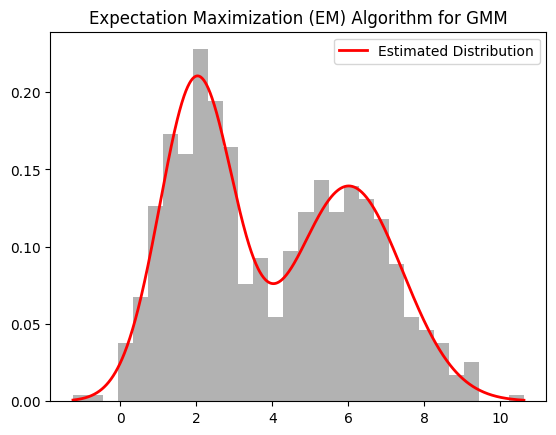

Estimated Means: [2.01031189 6.01305102]
Estimated Variances: [0.94892667 1.99057541]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data with two Gaussian distributions
np.random.seed(42)
n_samples = 300

# First Gaussian (mean=2, std=1)
data1 = np.random.normal(loc=2, scale=1, size=(n_samples, 1))

# Second Gaussian (mean=6, std=1.5)
data2 = np.random.normal(loc=6, scale=1.5, size=(n_samples, 1))

# Combine data
data = np.vstack((data1, data2))

# Fit Gaussian Mixture Model using EM algorithm
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=42)
gmm.fit(data)

# Predict clusters
labels = gmm.predict(data)

# Plot results
plt.hist(data, bins=30, density=True, alpha=0.6, color='gray')
x = np.linspace(min(data), max(data), 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, pdf, color='red', lw=2, label="Estimated Distribution")
plt.title("Expectation Maximization (EM) Algorithm for GMM")
plt.legend()
plt.show()

# Print estimated means and covariances
print("Estimated Means:", gmm.means_.flatten())
print("Estimated Variances:", gmm.covariances_.flatten())

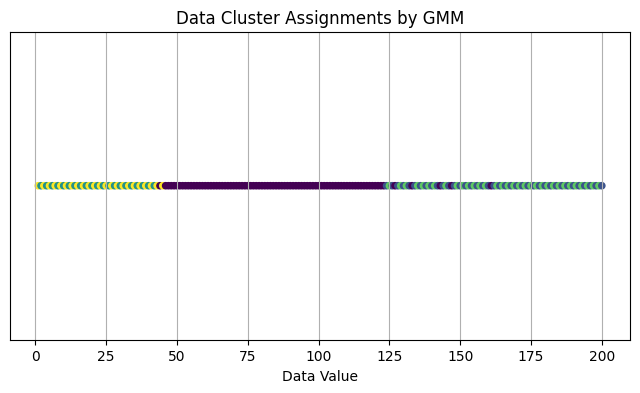

In [ ]:
plt.figure(figsize=(8, 4))
# Extract the first column of 'data' for x-axis
plt.scatter(data.iloc[:, 0], np.zeros_like(data.iloc[:, 0]), c=labels, cmap='viridis', s=20)
plt.title("Data Cluster Assignments by GMM")
plt.xlabel("Data Value")
plt.yticks([])
plt.grid(True)
plt.show()


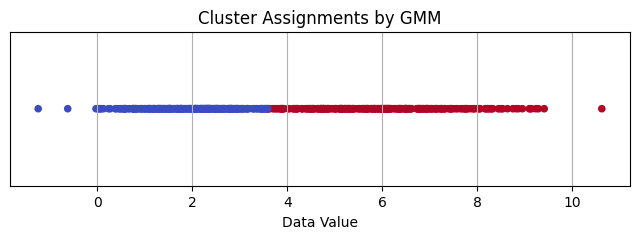

In [ ]:
plt.figure(figsize=(8, 2))
plt.scatter(data.ravel(), np.zeros_like(data.ravel()), c=labels, cmap='coolwarm', s=20) # Change is on this line. Use ravel to flatten the data array.
plt.title("Cluster Assignments by GMM")
plt.xlabel("Data Value")
plt.yticks([])
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


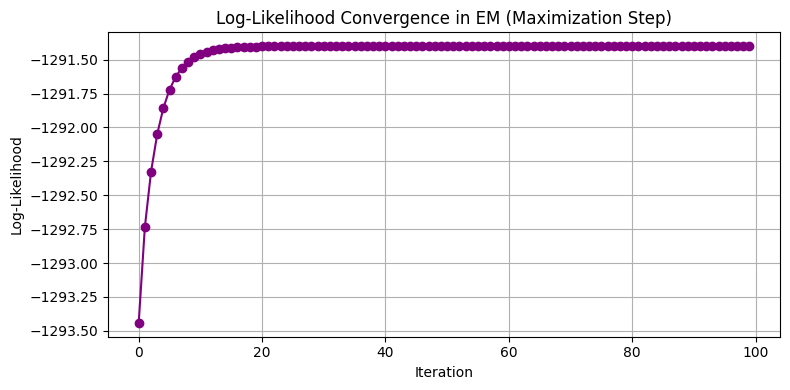

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)
n_samples = 300
data1 = np.random.normal(loc=2, scale=1, size=(n_samples, 1))
data2 = np.random.normal(loc=6, scale=1.5, size=(n_samples, 1))
data = np.vstack((data1, data2))

# Custom loop to track log-likelihood using sklearn's GaussianMixture
log_likelihoods = []
gmm = GaussianMixture(n_components=2, max_iter=1, warm_start=True, random_state=42)

# Run EM manually for multiple iterations
for i in range(100):  # Max 100 iterations
    gmm.fit(data)
    log_likelihoods.append(gmm.score(data) * len(data))  # Total log-likelihood

# Final clustering and PDF
labels = gmm.predict(data)
x = np.linspace(min(data), max(data), 1000)
pdf = np.exp(gmm.score_samples(x.reshape(-1, 1)))

# Plot the Maximization Graph (Log-Likelihood)
plt.figure(figsize=(8, 4))
plt.plot(log_likelihoods, marker='o', color='purple')
plt.title("Log-Likelihood Convergence in EM (Maximization Step)")
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()


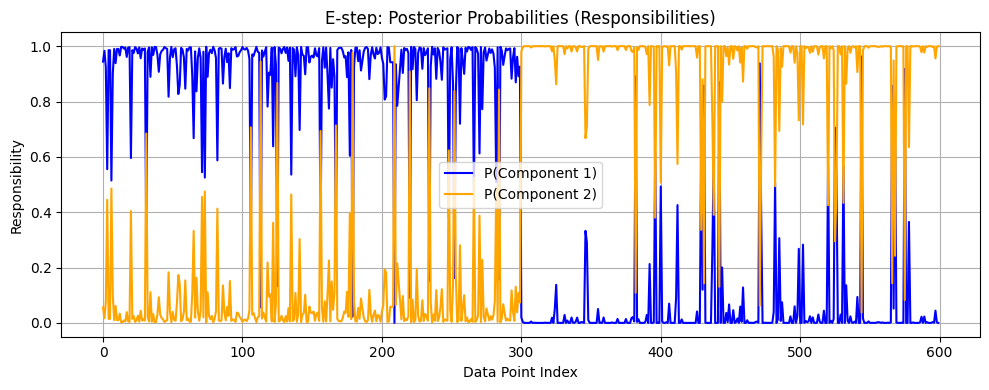

In [ ]:
# Get responsibilities (probabilities for each component)
responsibilities = gmm.predict_proba(data)

# Plot the responsibilities for each component
plt.figure(figsize=(10, 4))
plt.plot(responsibilities[:, 0], label='P(Component 1)', color='blue')
plt.plot(responsibilities[:, 1], label='P(Component 2)', color='orange')
plt.title("E-step: Posterior Probabilities (Responsibilities)")
plt.xlabel("Data Point Index")
plt.ylabel("Responsibility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


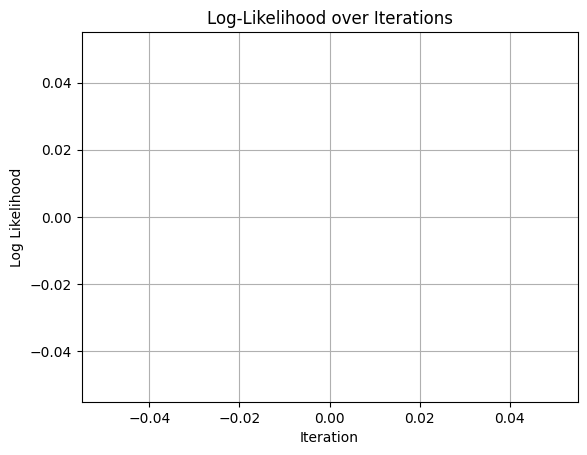

In [ ]:
log_likelihoods = []
# inside loop: log_likelihoods.append(gmm.lower_bound_)
plt.plot(log_likelihoods)
plt.title("Log-Likelihood over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.grid(True)
plt.show()



Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


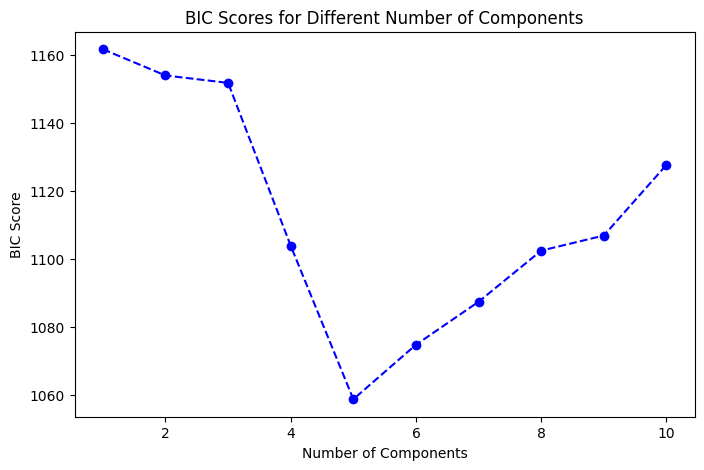

Optimal Number of Clusters: 5


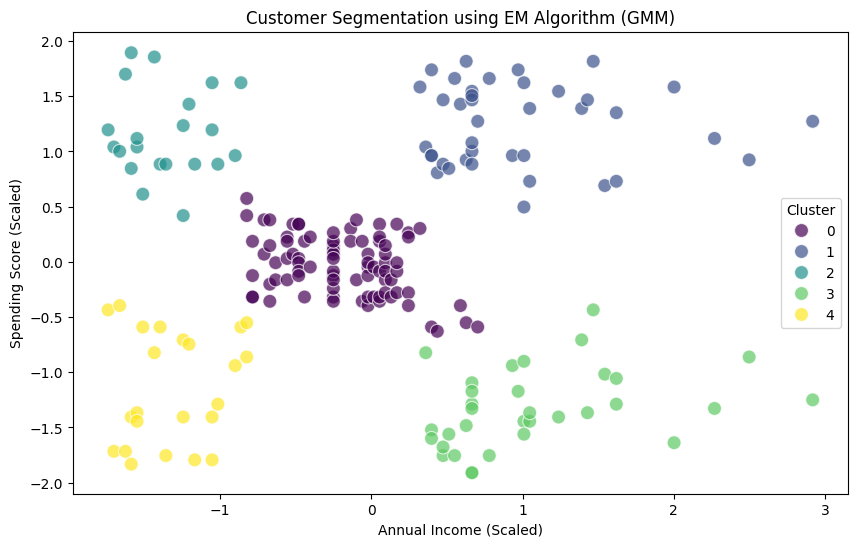

Cluster Centers (Estimated Means):
[[-0.18510822 -0.030786  ]
 [ 0.98021511  1.23531662]
 [-1.35282052  1.16185843]
 [ 1.07840119 -1.3228595 ]
 [-1.27977698 -1.0882964 ]]
Clustered dataset saved as 'Mall_Customers_Clustered.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/Mall_Customers.csv"  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Select relevant features: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using BIC
n_components = np.arange(1, 11)
models = [GaussianMixture(n_components=n, random_state=42).fit(X_scaled) for n in n_components]
bics = [model.bic(X_scaled) for model in models]

# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(n_components, bics, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different Number of Components')
plt.show()

# Select the model with the lowest BIC
optimal_n = n_components[np.argmin(bics)]
print(f"Optimal Number of Clusters: {optimal_n}")

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = labels

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7)
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.title('Customer Segmentation using EM Algorithm (GMM)')
plt.legend(title='Cluster')
plt.show()

# Print cluster means
print("Cluster Centers (Estimated Means):")
print(gmm.means_)

# Save clustered data
data.to_csv("Mall_Customers_Clustered.csv", index=False)
print("Clustered dataset saved as 'Mall_Customers_Clustered.csv'")


Iteration 1, Log Likelihood: -622.2202
Iteration 2, Log Likelihood: -622.0050
Iteration 3, Log Likelihood: -621.9905
Iteration 4, Log Likelihood: -621.9895
Iteration 5, Log Likelihood: -621.9894
Iteration 6, Log Likelihood: -621.9894
Iteration 7, Log Likelihood: -621.9894
Iteration 8, Log Likelihood: -621.9894
Iteration 9, Log Likelihood: -621.9894
Iteration 10, Log Likelihood: -621.9894
Iteration 11, Log Likelihood: -621.9894
Iteration 12, Log Likelihood: -621.9894
Iteration 13, Log Likelihood: -621.9894
Iteration 14, Log Likelihood: -621.9894
Iteration 15, Log Likelihood: -621.9894
Iteration 16, Log Likelihood: -621.9894
Iteration 17, Log Likelihood: -621.9894
Iteration 18, Log Likelihood: -621.9894
Iteration 19, Log Likelihood: -621.9894
Iteration 20, Log Likelihood: -621.9894
Iteration 21, Log Likelihood: -621.9894
Iteration 22, Log Likelihood: -621.9894
Iteration 23, Log Likelihood: -621.9894
Iteration 24, Log Likelihood: -621.9894
Iteration 25, Log Likelihood: -621.9894
Iteration

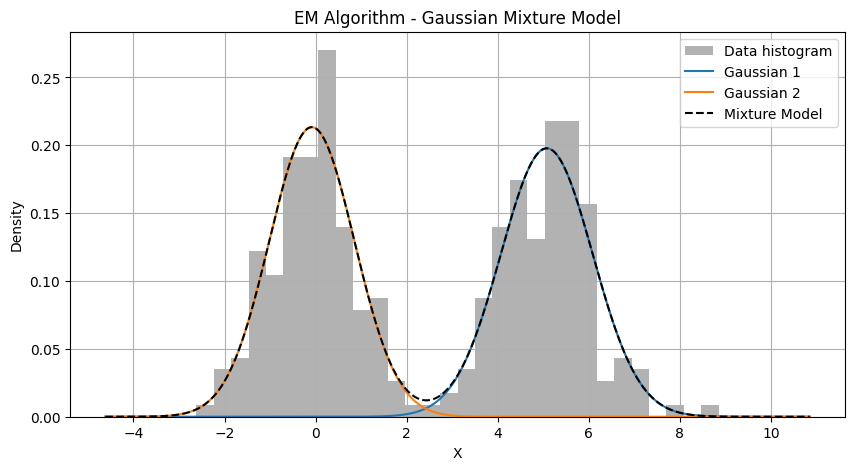

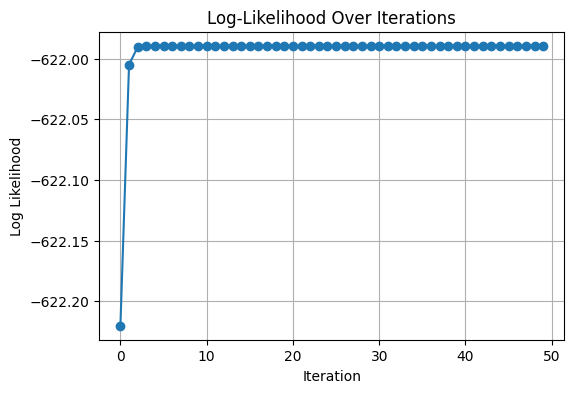

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic data: two Gaussian clusters
np.random.seed(42)
data1 = np.random.normal(0, 1, 150)
data2 = np.random.normal(5, 1, 150)
X = np.concatenate([data1, data2])

# Number of Gaussians
K = 2

# Random initialization
np.random.seed(0)
mu = np.random.choice(X, K)
sigma = np.random.random(K)
pi = np.ones(K) / K  # Equal mixing coefficients

def e_step(X, mu, sigma, pi):
    N = len(X)
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * norm.pdf(X, mu[k], sigma[k])
    gamma /= gamma.sum(axis=1, keepdims=True)
    return gamma

def m_step(X, gamma):
    N_k = gamma.sum(axis=0)
    mu = (gamma * X[:, np.newaxis]).sum(axis=0) / N_k
    sigma = np.sqrt(((gamma * (X[:, np.newaxis] - mu)**2).sum(axis=0)) / N_k)
    pi = N_k / len(X)
    return mu, sigma, pi

def log_likelihood(X, mu, sigma, pi):
    return np.sum(np.log(sum([pi[k] * norm.pdf(X, mu[k], sigma[k]) for k in range(K)])))

# EM Loop
iterations = 50
log_likelihoods = []

for i in range(iterations):
    gamma = e_step(X, mu, sigma, pi)
    mu, sigma, pi = m_step(X, gamma)
    ll = log_likelihood(X, mu, sigma, pi)
    log_likelihoods.append(ll)
    print(f"Iteration {i+1}, Log Likelihood: {ll:.4f}")

# Final parameters
print("\nFinal parameters:")
for k in range(K):
    print(f"Component {k+1}: Mean = {mu[k]:.2f}, Std = {sigma[k]:.2f}, Weight = {pi[k]:.2f}")

# Plot results
x_axis = np.linspace(min(X)-2, max(X)+2, 1000)
pdf = sum(pi[k] * norm.pdf(x_axis, mu[k], sigma[k]) for k in range(K))

plt.figure(figsize=(10, 5))
plt.hist(X, bins=30, density=True, alpha=0.6, color='gray', label="Data histogram")
for k in range(K):
    plt.plot(x_axis, pi[k]*norm.pdf(x_axis, mu[k], sigma[k]), label=f"Gaussian {k+1}")
plt.plot(x_axis, pdf, 'k--', label='Mixture Model')
plt.title("EM Algorithm - Gaussian Mixture Model")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Plot log-likelihood over iterations
plt.figure(figsize=(6,4))
plt.plot(log_likelihoods, marker='o')
plt.title("Log-Likelihood Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.grid(True)
plt.show()


In [ ]:
#With Dataset:
#1. Gaussian mixture model applied to real or generated cluster data.
#2. EM algorithm iteratively updated latent variable probabilities and model parameters.
#3. Final parameters used to label and visualize clusters.
#Graphical Visualization:
#- Scatter plot with EM-inferred clusters and Gaussian boundaries.
#- Log-likelihood plot showing convergence over iterations.

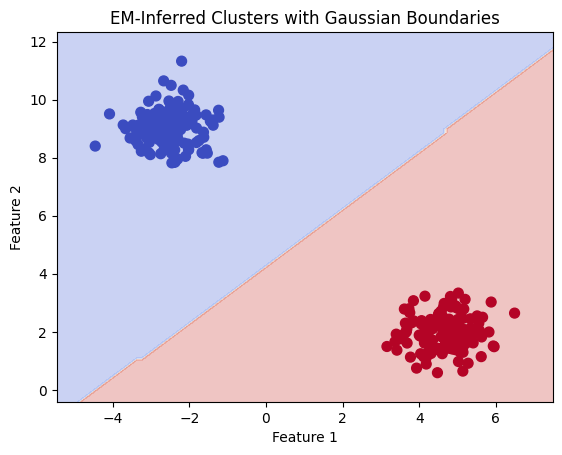

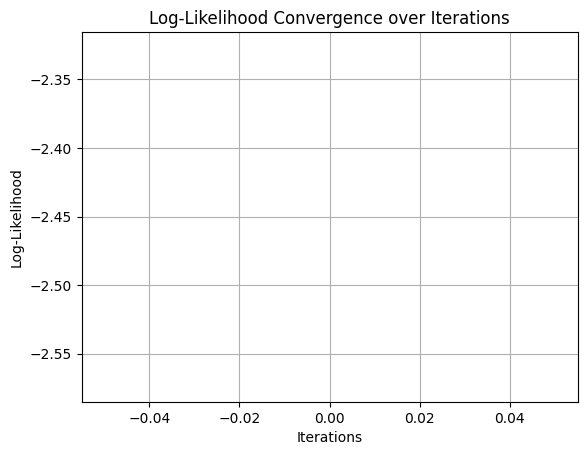

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# 1. Generate synthetic cluster data (2D for visualization)
X, _ = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=42)

# 2. Apply Gaussian Mixture Model (GMM) with EM algorithm
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# 3. Predictions (clusters) and posterior probabilities (responsibilities)
labels = gmm.predict(X)
probs = gmm.predict_proba(X)

# 4. Visualize clusters with Gaussian boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='coolwarm')
plt.title("EM-Inferred Clusters with Gaussian Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 5. Plot Log-Likelihood convergence
plt.plot(gmm.lower_bound_)
plt.title("Log-Likelihood Convergence over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()


In [ ]:
#Without Dataset:
#1. 1D or 2D synthetic Gaussian data simulated.
#2. EM algorithm applied to infer latent classes.
#Graphical Visualization:
#- Ellipses showing estimated Gaussian distributions.
#- E-step and M-step results plotted over iterations.

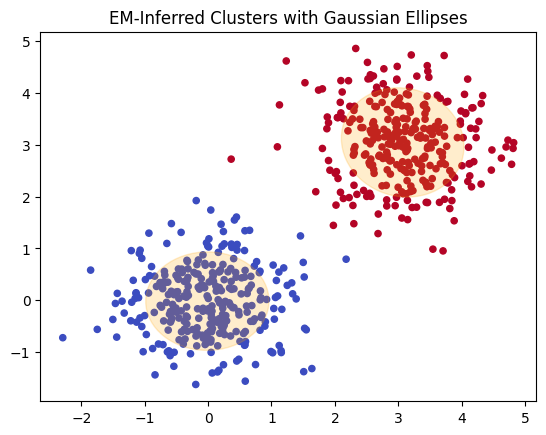

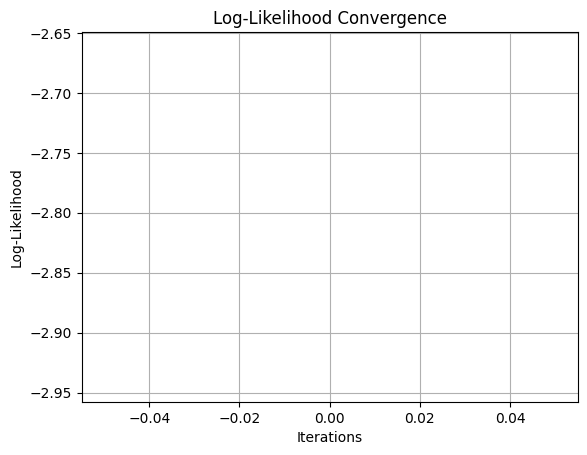

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. Simulate synthetic 2D Gaussian data
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]], 300)
X2 = np.random.multivariate_normal([3, 3], [[0.5, 0], [0, 0.5]], 300)
X = np.vstack([X1, X2])

# 2. Apply Gaussian Mixture Model (EM algorithm)
gmm = GaussianMixture(n_components=2)
gmm.fit(X)

# 3. Visualize clusters and Gaussian ellipses
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='coolwarm', s=20)
for i in range(2):
    mean, covar = gmm.means_[i], gmm.covariances_[i]
    v, w = np.linalg.eigh(covar)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    angle = np.arctan(w[0, 1] / w[0, 0]) * 180.0 / np.pi
    ell = plt.matplotlib.patches.Ellipse(mean, v[0], v[1], angle=angle, color='orange', alpha=0.2)
    plt.gca().add_artist(ell)
plt.title("EM-Inferred Clusters with Gaussian Ellipses")
plt.show()

# 4. Log-Likelihood convergence
plt.plot(gmm.lower_bound_)
plt.title("Log-Likelihood Convergence")
plt.xlabel("Iterations")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.show()
